In [1]:
# fpm.Modflow  Dis
# fpm.Modflow  Bas  (model, ibound=ibound, strt=20)
# fpm.Modflow  Lpf  (model, hk=10, laytyp=1)
# fpm.Modflow  Wel  (model, stress_period_data=lrcQ)
# fpm.Modflow  Pcg  (model)
# fpm.Modflow  Oc   (model)

In [3]:
template_ws = os.path.join(".","Beta_empty")     # test
if not(os.path.isdir(template_ws)):
    os.mkdir(template_ws)
else:
    shutil.rmtree(template_ws)                   # NEW FOLDER         # print(os.path.abspath(template_ws))

## `Kernel, __ Run all`

In [2]:
import os
import sys
from pprint import pformat
import matplotlib as mpl
import numpy as np
import flopy
import flopy.modflow as fpm
import flopy.utils as fpu
import shutil
import pyemu
import pandas as pd

In [4]:
exe = "MF2K5_FMP2_rls64"                         # ___________________How to execute in another folder ?
ws = os.path.join("Beta_temp_IN_OUT")
model = fpm.Modflow(modelname="Example_01_GW", exe_name=exe, model_ws=ws)

## DIS, ibound, K, RCH, ___, ___, 

In [5]:
fpm.ModflowDis(model, nlay=1, nrow=1, ncol=201, delr=10, delc=1, top=20, botm=-30)

# fpm.ModflowDis(model, nlay=1, nrow=2, ncol=3, delr=4, delc=5, top=6, botm=7)    # model.write_input()


MODFLOW Discretization Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.Modflow`) to which
    this package will be added.
nlay : int
    Number of model layers (the default is 1).
nrow : int
    Number of model rows (the default is 2).
ncol : int
    Number of model columns (the default is 2).
nper : int
    Number of model stress periods (the default is 1).
delr : float or array of floats (ncol), optional
    An array of spacings along a row (the default is 1.0).
delc : float or array of floats (nrow), optional
    An array of spacings along a column (the default is 0.0).
laycbd : int or array of ints (nlay), optional
    An array of flags indicating whether or not a layer has a Quasi-3D
    confining bed below it. 0 indicates no confining bed, and not zero
    indicates a confining bed. LAYCBD for the bottom layer must be 0. (the
    default is 0)
top : float or array of floats (nrow, ncol), optional
    An array of the 

In [6]:
ibound = np.ones((1, 201))
ibound[0, 0] = ibound[0, -1] = -1
fpm.ModflowBas(model, ibound=ibound, strt=20)


MODFLOW Basic Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
    this package will be added.
ibound : array of ints, optional
    The ibound array (the default is 1).
strt : array of floats, optional
    An array of starting heads (the default is 1.0).
ifrefm : bool, optional
    Indication if data should be read using free format (the default is
    True).
ixsec : bool, optional
    Indication of whether model is cross sectional or not (the default is
    False).
ichflg : bool, optional
    Flag indicating that flows between constant head cells should be
    calculated (the default is False).
stoper : float
    percent discrepancy that is compared to the budget percent discrepancy
    continue when the solver convergence criteria are not met.  Execution
    will unless the budget percent discrepancy is greater than stoper
    (default is None). MODFLOW-2005 only
hnoflo : float
    Head value assigne

In [7]:
fpm.ModflowLpf(model, hk=9, laytyp=1)


MODFLOW Layer Property Flow Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
    this package will be added.
ipakcb : int, optional
    Toggles whether cell-by-cell budget data should be saved. If None or zero,
    budget data will not be saved (default is None).
hdry : float
    Is the head that is assigned to cells that are converted to dry during
    a simulation. Although this value plays no role in the model
    calculations, it is useful as an indicator when looking at the
    resulting heads that are output from the model. HDRY is thus similar
    to HNOFLO in the Basic Package, which is the value assigned to cells
    that are no-flow cells at the start of a model simulation.
    (default is -1.e30).
laytyp : int or array of ints (nlay)
    Layer type, contains a flag for each layer that specifies the layer
    type.
    0 confined
    >0 convertible
    <0 convertible unless the THICKSTRT opti

In [8]:
fpm.ModflowRch(model, rech=0.001)                         # RCH
lrcQ = {0: [[0, 0, 50, 2], [0, 0, 150, -5]]}
fpm.ModflowWel(model, stress_period_data=lrcQ)            # Wells  ____-1 m3/d  ____-5 m3/d  


MODFLOW Well Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
    this package will be added.
ipakcb : int, optional
    Toggles whether cell-by-cell budget data should be saved. If None or zero,
    budget data will not be saved (default is None).
stress_period_data : list, recarray, dataframe or dictionary of boundaries.
    Each well is defined through definition of
    layer (int), row (int), column (int), flux (float).
    The simplest form is a dictionary with a lists of boundaries for each
    stress period, where each list of boundaries itself is a list of
    boundaries. Indices of the dictionary are the numbers of the stress
    period. This gives the form of:

        stress_period_data =
        {0: [
            [lay, row, col, flux],
            [lay, row, col, flux],
            [lay, row, col, flux]
            ],
        1:  [
            [lay, row, col, flux],
            [lay, row, c

In [9]:
fpm.ModflowPcg(model)


MODFLOW Pcg Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
    this package will be added.
mxiter : int
    maximum number of outer iterations. (default is 50)
iter1 : int
    maximum number of inner iterations. (default is 30)
npcond : int
    flag used to select the matrix conditioning method. (default is 1).
    specify npcond = 1 for Modified Incomplete Cholesky.
    specify npcond = 2 for Polynomial.
hclose : float
    is the head change criterion for convergence. (default is 1e-5).
rclose : float
    is the residual criterion for convergence. (default is 1e-5)
relax : float
    is the relaxation parameter used with npcond = 1. (default is 1.0)
nbpol : int
    is only used when npcond = 2 to indicate whether the estimate of the
    upper bound on the maximum eigenvalue is 2.0, or whether the estimate
    will be calculated. nbpol = 2 is used to specify the value is 2.0;
    for any other value o

In [10]:
fpm.ModflowOc(model)


MODFLOW Output Control Package Class.

Parameters
----------
model : model object
    The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
    this package will be added.
ihedfm : int
    is a code for the format in which heads will be printed.
    (default is 0).
iddnfm : int
    is a code for the format in which drawdown will be printed.
    (default is 0).
chedfm : string
    is a character value that specifies the format for saving heads.
    The format must contain 20 characters or less and must be a valid
    Fortran format that is enclosed in parentheses. The format must be
    enclosed in apostrophes if it contains one or more blanks or commas.
    The optional word LABEL after the format is used to indicate that
    each layer of output should be preceded with a line that defines the
    output (simulation time, the layer being output, and so forth). If
    there is no record specifying CHEDFM, then heads are written to a
    binary (unformatted) file. Binary

# Writing 

In [11]:
model.write_input()
success, buff = model.run_model(silent=True, report=True)
assert success, pformat(buff)

# Then

In [12]:
fpth = os.path.join(ws, "Example_01_GW.hds")   
hfile = fpu.HeadFile(fpth)
h = hfile.get_data(totim=1.0)

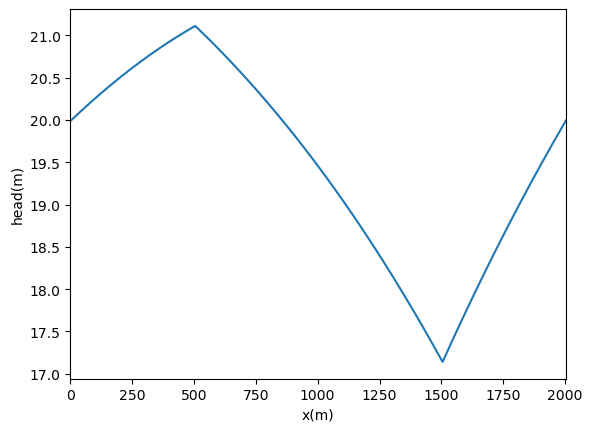

In [13]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
x = model.modelgrid.xcellcenters[0]
ax.plot(x, h[0, 0, :])                      # h ( above )
ax.set_xlim(0, x.max())
ax.set_xlabel("x(m)")
ax.set_ylabel("head(m)")
plt.show()

In [18]:
# pip install openpyxl
# import openpyxl
# filename = 'b00.xlsx'
# wb = openpyxl.load_workbook('b00.xlsx')
# how to order the opening of my external spreadsheet ?